# Mínimos cuadrados lineales

In [ ]:
# Esto hay que ejecutarlo solo en Colab para cargar el modulo propio Solsislin dentro del entorno de ejecucion
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# El archivo Solsislin.py debe estar en la raiz de su drive para que esta instrucccion funcione
# si no, cambie por la ruta adecuada dentro de su drive
!cp /content/drive/MyDrive/Solsislin.py .

In [ ]:
# Modulos
import numpy as np
import Solsislin as ssl # Modulo propio
import matplotlib.pyplot as plt
import csv # Manejo de archivos csv
import sympy # Simbolico
import ipywidgets as widgets # Controles
from ipywidgets import interact, interact_manual

In [ ]:
# Funciones auxiliares
def canonico(n,j = 1):
    """Crea el j-esimo vector canonico e_{j} en R^{n}
    - Entrada >
      n (entero) - Dimension.
      j (entero) - Elemento de la base canonica.
    - Salida >
      x (1D ndarray) - Vector e_{j} en R^{n}. Si j > n entonces regresa e_{1}
    """
    x,indx = np.zeros((max(1,n),)),0
    if j >= 0 and j <= n:
        indx = j-1
    x[indx] = 1.0
    return x

## Ajuste de datos

Uno de los usos más comunes del método de mínimos cuadrados es el *ajuste de datos*, especialmente cuando los datos tienen algún error asociado a ellos, como la mayoría de las mediciones de laboratorio u otras observaciones de la naturaleza. Dado $m$ datos $(t_{i},y_{i})$ queremos encontrar un vector $\pmb{x}$ de parámetros de tamaño $n$ que "mejor" ajusten los datos por una *función modelo*, con $f\colon\mathbb{R}^{n+1}\to \mathbb{R}$, donde por el mejor ajuste se refiere en el sentido de mínimos cuadrados
$$
    \min_{\pmb{x}}\sum_{i=1}^{m}(y_{i} - f(t_{i},\pmb{x}))^{2}
$$
Un problema de ajuste de datos es *lineal* si la función $f$ es lineal en las componentes del vector de parámetros $\pmb{x}$, lo que significa que $f$ es una combinación lineal
$$
    f(t,\pmb{x}) = x_{1}\phi_{1}(t) + x_{2}\phi_{2}(t) + \cdots + x_{n}\phi_{n}(t)
$$
de funciones $\phi_{j}$ que dependen solo de $t$. Por ejemplo, ajuste polinomial, con
$$
    f(t,\pmb{x}) = x_{1} + x_{2}t + x_{3}t^{2} + \cdots + x_{n}t^{n-1}(t)
$$
es un problema lineal de ajuste de datos dado que un polinomio es lineal en sus coeficientes $x_{j}$, aunque no lineal con respecto a $t$. Si definimos una matriz $A$ con entradas $a_{i,j} = \phi_{j}(t_{i})$ y con vector $\pmb{y}$ con las componentes $y_{i}$, entonces un problema de mínimos cuadrados lineales toma la forma
$$
    A\pmb{x} \cong \pmb{y}
$$

Por ejemplo, al ajustar un polinomio cuadrático, el cual tiene tres parámetros, a cinco datos $(t_{1},y_{1}),\ldots,(t_{5},y_{5})$, la matriz $A$ es de tamaño $5\times 3$ y el problema tiene la forma
$$
    A\pmb{x} = \begin{pmatrix}
        1 & t_{1} & t_{1}^{2}\\
        1 & t_{2} & t_{2}^{2}\\
        1 & t_{3} & t_{3}^{2}\\
        1 & t_{4} & t_{4}^{2}\\
        1 & t_{5} & t_{5}^{2}\\
    \end{pmatrix}
    \begin{pmatrix}
        x_{1} \\ x_{2} \\ x_{3}
    \end{pmatrix}\cong
    \begin{pmatrix}
        y_{1} \\ y_{2} \\ y_{3}\\ y_{4}\\ y_{5}
    \end{pmatrix} = \pmb{y}
$$

Una matriz de esta forma particular, cuyas columnas (o renglones) son potencias sucesivas de alguna variable independiente, es llamada una **matriz de Vandermonde**.

### Ecuaciones Normales

Como un problema de minimización, un problema de minimos cuadrados puede ser tratado usando metodos de calculo multivariado, análogo a hacer la derivada igual a cero en calculo de una variable. Queremos minimizar la norma euclidiana al cuadrado del vector residual $\pmb{r} = \pmb{y}-A\pmb{x}$. Denotando esta función objetivo por $\psi\colon\mathbb{R}^{n}\to\mathbb{R}$, tenemos
$$
    \psi(\pmb{x}) = \|\pmb{r}\|_{2}^{2} = \pmb{r}^{\intercal}\pmb{r} = (\pmb{y}-A\pmb{x})^{\intercal}(\pmb{y}-A\pmb{x}) = \pmb{y}^{\intercal}\pmb{y}-2\pmb{x}^{\intercal}A^{\intercal}\pmb{y} + \pmb{x}^{\intercal}A^{\intercal}A\pmb{x}
$$

Una condición necesaria para encontrar un mínimo es que $\pmb{x}$ sea un punto crítico de $\psi$, esto es donde el vector gradiente $\nabla\psi(\pmb{x})$, cuya $i$-ésima componente esta dada por $\partial\psi(\pmb{x})/\partial x_{i}$, es cero. Así, debemos tener
$$
\pmb{0} = \nabla\psi(\pmb{x}) = 2A^{\intercal}A\pmb{x} - 2A^{\intercal}\pmb{y}
$$
tal que cualquier mínimo $\pmb{x}$ de $\psi$ debe satisfacer el sistema lineal simétrico de $n\times n$
$$
A^{\intercal}A\pmb{x} = A^{\intercal}\pmb{y}.
$$

Una condición suficiente para que tal $\pmb{x}$ sea en efecto un mínimo es que la matriz Hessiana de segundas derivadas parciales, la cual está dada en este caso solo por $2A^{\intercal}A$, sea positiva definida. Es fácil ver que $A^{T}A$ es positiva definida, si y solo si, las columnas de $A$ son linealmente independientes, *i.e.*, $\mathrm{rango}(A) = n$. 

El sistema lineal $A^{\intercal}A\pmb{x} = A^{\intercal}\pmb{y}$ es comunmente conocido como sistema de **ecuaciones normales**. Resolviendo este sistema lineal podemos encontra el vector de parámetros $\pmb{x}$ para nuestra función modelo que mejor ajusta los datos, ya que 
$$
    \min_{\pmb{x}}\sum_{i=1}^{m}(y_{i} - f(t_{i},\pmb{x}))^{2} = \min_{\pmb{x}}\psi(\pmb{x})
$$

#### Ejemplo

Consideramos la tabla de datos 

| $i$ | $t_{i}$ | $y_{i}$  |
|-----|---------|----------|
| 1   | 2.6578  | -6.4552  |
| 2   | 3.992   | -14.9657 |
| 3   | 0.2389  | 0.2798   |
| 4   | 1.5106  | -2.0462  |
| 5   | 3.2851  | -10.539  |


y queremos hacer el ajuste polinomial, para lo cual se considera la función modelo
$$
    f(t,\pmb{x}) = x_{1} + x_{2}t + x_{3}t^{2}
$$
entonces vamos a buscar el vector de coeficientes $\pmb{x}$ que mejor ajuste $f$ a los datos de la tabla $(t_{i},y_{i})$ mediante el uso de las ecuaciones normales.

Tomando
$$
    \pmb{t} = \begin{pmatrix}
         2.6578 \\ 3.992 \\ 0.2389 \\ 1.5106 \\ 3.2851
    \end{pmatrix}\qquad\text{y}\qquad
    \pmb{y} = \begin{pmatrix}
         -6.4552 \\ -14.9657 \\ 0.2798 \\ -2.0462 \\ -10.539
    \end{pmatrix}
$$

Luego, el problema tiene la forma

$$
    \begin{pmatrix}
        2.6578^{2} & 2.6578 & 1\\
        3.992^{2} & 3.992  & 1\\
        0.2389^{2} & 0.2389 & 1\\
        1.5106^{2} & 1.5106 & 1\\
        3.2851^{2} & 3.2851 & 1\\
    \end{pmatrix}
    \begin{pmatrix}
        x_{3} \\ x_{2} \\ x_{1}
    \end{pmatrix}\cong
    \begin{pmatrix}
        -6.4552 \\ -14.9657 \\ 0.2798 \\ -2.0462 \\ -10.539
    \end{pmatrix}
$$

A = 
[[ 7.0639  2.6578  1.    ]
 [15.9361  3.992   1.    ]
 [ 0.0571  0.2389  1.    ]
 [ 2.2819  1.5106  1.    ]
 [10.7919  3.2851  1.    ]]


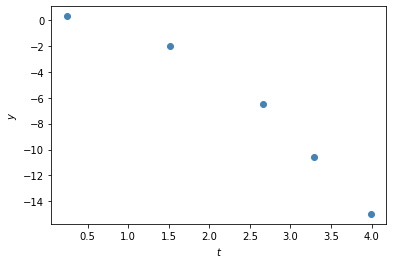

In [ ]:
t = np.array([2.6578,3.992,0.2389,1.5106,3.2851])
y = np.array([-6.4552,-14.9657,0.2798,-2.0462,-10.539])
A = np.vander(t,3)
with np.printoptions(precision=4, suppress=True):
    print("A = ",A,sep="\n")
    
# Se grafican los datos
plt.scatter(t,y,color = 'steelblue',label='Datos')
ax = plt.gca()
ax.set_xlabel("$t$")
ax.set_ylabel("$y$")
plt.show()

Se construye el sistema de ecuaciones normales
$$
    A^{\intercal}A\pmb{x} = 
    \begin{pmatrix}
        \displaystyle\sum_{i=1}^{5}t_{i}^{4} & \displaystyle\sum_{i=1}^{5}t_{i}^{3} & \displaystyle\sum_{i=1}^{5}t_{i}^{2}\\
        \displaystyle\sum_{i=1}^{5}t_{i}^{3} & \displaystyle\sum_{i=1}^{5}t_{i}^{2} & \displaystyle\sum_{i=1}^{5}t_{i}\\
        \displaystyle\sum_{i=1}^{5}t_{i}^{2} & \displaystyle\sum_{i=1}^{5}t_{i} & 5
    \end{pmatrix}
    \begin{pmatrix}
        x_{3} \\ x_{2} \\ x_{1}
    \end{pmatrix}
    = 
    \begin{pmatrix}
        \displaystyle\sum_{i=1}^{5}y_{i}t_{i}^{2}\\
        \displaystyle\sum_{i=1}^{5}y_{i}t_{i}\\
        \displaystyle\sum_{i=1}^{5}y_{i}
    \end{pmatrix} = A^{\intercal}\pmb{y}
$$
y dado que $A^{\intercal}A$ es una matriz simétrica definida positiva, podemos aplicar la factorización de Cholesky de modo tal que
$$
    LL^{\intercal} = A^{\intercal}A
$$
donde $L$ es una matriz triangular inferior.

In [ ]:
L = ssl.chol(A.T@A)
with np.printoptions(precision=4, suppress=True):
    print(L)

[[20.6284  0.      0.    ]
 [ 5.8804  1.2455  0.    ]
 [ 1.7515  1.1118  0.8343]]


De tal manera que se resuelvan los sistemas
$$
    L\pmb{w} = A^{\intercal}\pmb{y}\quad\text{y}\quad L^{\intercal}\pmb{x} = \pmb{w}
$$
para obtener el vector de parámetros $\pmb{x}$

In [ ]:
x = ssl.STS(L.T,ssl.STI(L,y@A))
print(x)

[-0.9123063  -0.2372208   0.40157372]


El vector solución es:
$$
    \pmb{x^{*}} = \begin{pmatrix}
        0.4016 \\ -0.2372208 \\ -0.9123
    \end{pmatrix}
$$

De esta manera la función modelo que mejor ajusta a los datos en el sentido de mínimos cuadrados es:
$$
    f(t,\pmb{x}^{*}) = 0.4016 - 0.2372208t -0.9123t^{2}
$$

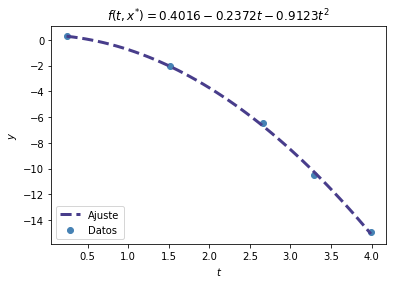

In [ ]:
# Grafica del ajuste
p = np.linspace(min(t),max(t));
ep = np.vander(p,3) @ x;
plt.plot(p,ep,'--',color='darkslateblue',label='Ajuste',linewidth = 3)
plt.scatter(t,y,color = 'steelblue',label='Datos')
ax = plt.gca();
ax.legend(loc = 'lower left')
ax.set_xlabel("$t$")
ax.set_ylabel("$y$")
ax.set_title(f"$f(t,x^{{*}}) = {x[2]:2.4f} {x[1]:+2.4f}t {x[0]:+2.4f}t^{2} $")
plt.show()

### Factorización QR

La transformación ortogonal a una forma triangular se consigue mediante la factorización QR, la cual, para una matriz $A$ de tamaño $m\times n$ con $m>n$, tiene la forma

$$
    A = Q\begin{pmatrix}R\\ O\end{pmatrix}
$$

donde $Q$ es una matriz ortogonal de $m\times m$, $R$ es una matriz triangular de $n \times n$ y $O$ es una matriz de tamaño $(m-n) \times n$ con todas sus entradas 0. Esta factorización transforma el problema de mínimos cuadrados lineales $A\pmb{x}\cong \pmb{y}$ en un problema de mínimos cuadrados triangular que tiene la misma solución, ya que
$$
    \|\pmb{r}\|_{2}^{2} = \|\pmb{y}-A\pmb{x}\|_{2}^{2} = \left\|\pmb{y}-Q\begin{pmatrix}R\\ O\end{pmatrix}\pmb{x}\right\|_{2}^{2} = \left\|Q^{\intercal}\pmb{y}-\begin{pmatrix}R\\ O\end{pmatrix}\pmb{x}\right\|_{2}^{2} = \|\pmb{c}_{1}-R\pmb{x}\|_{2}^{2} + \|\pmb{c}_{2}\|_{2}^{2}
$$
donde
$$
    Q^{\intercal}\pmb{y} = \begin{pmatrix}\pmb{c}_{1}\\ \pmb{c}_{2}\end{pmatrix}
$$
con $\pmb{c}_{1}\in\mathbb{R}^{n}$. Si el vector solución $\pmb{x}$ satisface el sistema triangular 
$$
    R\pmb{x} = \pmb{c}_{1}
$$ 
la norma residual mínima está dada por $\|\pmb{r}\|_{2} = \|\pmb{c}_{2}\|_{2}$.

#### Transformaciones de Householder


Consideraremos el ajuste de curvas utilizando la factorización QR mediante transformaciones de Householder
$$
    H = I - 2\dfrac{\pmb{v}\pmb{v}^{\intercal}}{\pmb{v}^{\intercal}\pmb{v}}
$$
para $\pmb{v}\neq\pmb{0}$. De esta manera podemos generar un conjunto de transformaciones que aplicados a $A$ que produzcan una matriz triangular superior, esto es,
$$
        H_{n}\cdots H_{1}A = \begin{pmatrix}R\\ 0\end{pmatrix}
$$
o lo que es lo mismo, una factorización de la forma
$$
        A = Q\begin{pmatrix}R\\ 0\end{pmatrix}
$$
con $Q = H_{1}\cdots H_{n}$ la cual es ortogonal.

##### Ejemplo

Consideramos nuevamente la tabla de datos 

| $i$ | $t_{i}$ | $y_{i}$  |
|-----|---------|----------|
| 1   | 2.6578  | -6.4552  |
| 2   | 3.992   | -14.9657 |
| 3   | 0.2389  | 0.2798   |
| 4   | 1.5106  | -2.0462  |
| 5   | 3.2851  | -10.539  |


y queremos hacer el ajuste polinomial, para lo cual se considera la función modelo
$$
    f(t,\pmb{x}) = x_{1} + x_{2}t + x_{3}t^{2}
$$
entonces vamos a buscar el vector de coeficientes $\pmb{x}$ que mejor ajuste $f$ a los datos de la tabla $(t_{i},y_{i})$ mediante el uso de las ecuaciones normales.

Tomando
$$
    \pmb{t} = \begin{pmatrix}
         2.6578 \\ 3.992 \\ 0.2389 \\ 1.5106 \\ 3.2851
    \end{pmatrix}\qquad\text{y}\qquad
    \pmb{y} = \begin{pmatrix}
         -6.4552 \\ -14.9657 \\ 0.2798 \\ -2.0462 \\ -10.539
    \end{pmatrix}
$$

Luego, el problema tiene la forma

$$
    \begin{pmatrix}
        2.6578^{2} & 2.6578 & 1\\
        3.992^{2} & 3.992  & 1\\
        0.2389^{2} & 0.2389 & 1\\
        1.5106^{2} & 1.5106 & 1\\
        3.2851^{2} & 3.2851 & 1\\
    \end{pmatrix}
    \begin{pmatrix}
        x_{3} \\ x_{2} \\ x_{1}
    \end{pmatrix}\cong
    \begin{pmatrix}
        -6.4552 \\ -14.9657 \\ 0.2798 \\ -2.0462 \\ -10.539
    \end{pmatrix}
$$

In [ ]:
t = np.array([2.6578,3.992,0.2389,1.5106,3.2851])
y = np.array([-6.4552,-14.9657,0.2798,-2.0462,-10.539])
A = np.vander(t,3)

Primero se construye el vector $\pmb{v}$ que hace ceros debajo la diagonal de la entrada $a_{1,1}$ de la matriz $A$, esto es,
$$
\pmb{v}_{1} = A^{[1]} - (-\mathrm{sgn}(a_{1,1}))\|A^{[1]}\|_{2}e_{1}
$$
con $\alpha_{1} = (-\mathrm{sgn}(a_{1,1}))\|A^{[1]}\|_{2}$ y 
$$
Q_{1} = I_{5} - 2\dfrac{\pmb{v}_{1}\pmb{v}_{1}^{\intercal}}{\pmb{v}^{\intercal}_{1}\pmb{v}_{1}}
$$
para obtener
$$
    Q_{1}A = \left(\begin{array}{c|c}
        \alpha_{1} & \star_{1\times 2} \\\hline
        \pmb{0}_{4\times 1} &  A^{(2)}_{4\times 2}
    \end{array}\right)
$$

In [ ]:
v = A[:,0] + np.sign(A[0,0])*np.linalg.norm(A[:,0])*canonico(5)
V = np.array([v.tolist()],copy = True)
Q1 = np.eye(5) - 2/(v@v)*(V.T@V)
with np.printoptions(precision=4, suppress=True):
    print(Q1@A)
A2 = Q1@A

[[-20.6284  -5.8804  -1.7515]
 [ -0.      -0.9215  -0.5834]
 [ -0.       0.2213   0.9943]
 [ -0.       0.807    0.7733]
 [ -0.      -0.0423  -0.0723]]


Después, se construye el vector $\pmb{v}$ que hace ceros debajo la diagonal de la entrada $a_{1,1}^{(2)}$ de la matriz $A^{(2)}$, esto es,
$$
\pmb{v}_{2} = \left(A^{(2)}\right)^{[1]} - \left(-\mathrm{sgn}\left(a_{1,1}^{(2)}\right)\right)\left\|\left(A^{(2)}\right)^{[1]}\right\|_{2}e_{1}
$$
con $\alpha_{2} = \left(-\mathrm{sgn}\left(a_{1,1}^{(2)}\right)\right)\left\|\left(A^{(2)}\right)^{[1]}\right\|_{2}$ y 
$$
Q_{2}^{*} = I_{4} - 2\dfrac{\pmb{v}_{2}\pmb{v}_{2}^{\intercal}}{\pmb{v}_{2}^{\intercal}\pmb{v}_{2}}
$$
para obtener
$$
    Q_{2}^{*}A^{(2)} = \left(\begin{array}{c|c}
        \alpha_{2} & \star \\\hline
        \pmb{0}_{3\times 1} &  A^{(3)}_{3\times 1}
    \end{array}\right)
$$
de tal modo que si tomamos
$$
    Q_{2} = \left(\begin{array}{cc}
        1 & \pmb{0} \\
        \pmb{0} & Q_{2}^{*}
    \end{array}\right)
$$
obtengamos
$$
    Q_{2}Q_{1}A = \left(\begin{array}{cc|c}
        \alpha_{1} & \star & \star\\
        0 & \alpha_{2} & \star \\\hline
        \pmb{0} & \pmb{0} &  A^{(3)}
    \end{array}\right)
$$

In [ ]:
v = A2[1:,1] + np.sign(A2[1,1])*np.linalg.norm(A2[1:,1])*canonico(4)
V = np.array([v.tolist()],copy = True)
Q2 = np.eye(5)
Q2[1:,1:] = Q2[1:,1:] - 2/(v@v)*(V.T@V)
with np.printoptions(precision=4, suppress=True):
    print(Q2@A2)
A3 = Q2@A2

[[-20.6284  -5.8804  -1.7515]
 [  0.       1.2455   1.1118]
 [ -0.       0.       0.8212]
 [ -0.       0.       0.1419]
 [ -0.      -0.      -0.0392]]


Por último, se construye el vector $\pmb{v}$ que hace ceros debajo la diagonal de la entrada $a_{1,1}^{(3)}$ de la matriz $A^{(3)}$,
$$
\pmb{v}_{3} = \left(A^{(3)}\right)^{[1]} - \left(-\mathrm{sgn}\left(a_{1,1}^{(3)}\right)\right)\left\|\left(A^{(3)}\right)^{[1]}\right\|_{2}e_{1}
$$
con $\alpha_{3} = \left(-\mathrm{sgn}\left(a_{1,1}^{(3)}\right)\right)\left\|\left(A^{(3)}\right)^{[1]}\right\|_{2}$ y 
$$
Q_{3}^{*} = I_{3} - 2\dfrac{\pmb{v}_{3}\pmb{v}_{3}^{\intercal}}{\pmb{v}_{3}^{\intercal}\pmb{v}_{3}}
$$
para obtener
$$
    Q_{3}^{*}A^{(3)} = \begin{pmatrix}
        \alpha_{3} \\ 0 \\ 0
    \end{pmatrix}.
$$
Así, al tomar
$$
    Q_{3} = \begin{pmatrix}
        1 & 0 & \pmb{0}\\
        0 & 1 & \pmb{0} \\
        \pmb{0} & \pmb{0} &  Q^{*}_{3}\\
    \end{pmatrix}
$$
Se tenga que
$$
    Q_{3}Q_{2}Q_{1}A = \left(\begin{array}{ccc}
        \alpha_{1} & \star & \star\\
        0 & \alpha_{2} & \star \\
        0 & 0 &  \alpha_{3}\\
        0 & 0 & 0 \\ 
        0 & 0 & 0
    \end{array}\right)
$$

In [ ]:
v = A3[2:,2] + np.sign(A3[2,2])*np.linalg.norm(A3[2:,2])*canonico(3)
V = np.array([v.tolist()],copy = True)
Q3 = np.eye(5)
Q3[2:,2:] = Q3[2:,2:] - 2/(v@v)*(V.T@V)
with np.printoptions(precision=4, suppress=True):
    print("R = ",Q3@A3,sep='\n\n')
R = Q3@A3

R = 

[[-20.6284  -5.8804  -1.7515]
 [  0.       1.2455   1.1118]
 [  0.      -0.      -0.8343]
 [ -0.       0.      -0.    ]
 [ -0.      -0.       0.    ]]


In [ ]:
with np.printoptions(precision=4, suppress=True):
    print("Q=",Q1.T@Q2.T@Q3.T,sep="\n\n")
Q = Q1.T@Q2.T@Q3.T

Q=

[[-0.3424  0.5172  0.2095 -0.5614 -0.5061]
 [-0.7725 -0.4423 -0.1662  0.2851 -0.3142]
 [-0.0028  0.1788 -0.9546 -0.2334  0.0483]
 [-0.1106  0.6906 -0.0461  0.7127 -0.0291]
 [-0.5232  0.1676  0.123  -0.2029  0.8012]]


Una vez calculada $R$, procedemos a resolver el sistema
$$
    R\pmb{x} = \pmb{c}_{1}
$$
para obtener el vector de parámetros $\pmb{x}$. El vector $\pmb{c}_{1}$ se puede obtener al particionar $Q = \begin{pmatrix}Q_{1} & Q_{2} \end{pmatrix}$, donde $Q_{1}$ tiene las primeras $n$ columnas de $Q$ y $Q_{2}$ tiene las $m-n$ restantes. De esta forma, $\pmb{c}_{1} = Q_{1}^{\intercal}\pmb{y}$.

In [ ]:
x = ssl.STS(R[:3,:3],y@Q[:,:3])
print(x)

[-0.9123063  -0.2372208   0.40157372]


El vector solución es:
$$
    \pmb{x^{*}} = \begin{pmatrix}
        0.4016 \\ -0.2372208 \\ -0.9123
    \end{pmatrix}
$$

De esta manera la función modelo que mejor ajusta a los datos en el sentido de mínimos cuadrados es:
$$
    f(t,\pmb{x}^{*}) = 0.4016 - 0.2372t -0.9123t^{2}
$$

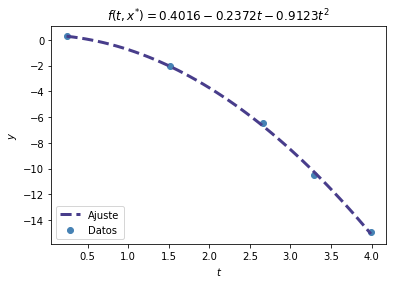

In [ ]:
# Grafica del ajuste
p = np.linspace(min(t),max(t));
ep = np.vander(p,3) @ x;
plt.plot(p,ep,'--',color='darkslateblue',label='Ajuste',linewidth = 3)
plt.scatter(t,y,color = 'steelblue',label='Datos')
ax = plt.gca();
ax.legend(loc = 'lower left')
ax.set_xlabel("$t$")
ax.set_ylabel("$y$")
ax.set_title(f"$f(t,x^{{*}}) = {x[2]:2.4f} {x[1]:+2.4f}t {x[0]:+2.4f}t^{2}$")
plt.show()

En ```numpy``` contamos con la factorización QR mediante la función ```qr``` dentro del submódulo ```linalg```. Si la función es llamada mediante un sólo argumento, la función regresará la matriz $Q_{1}$ y la matriz $R$, que sería la forma *reducida* de la factorización QR. Tambien se puede obtener la factorización completa al pasar la cadena ```'complete'``` como segundo argumento a la función. Utilizaremos el ejemplo anterior para obtener el vector de parámetros $\pmb{x}$.

In [ ]:
# Se calcula la factorización QR reducida
Q,R = np.linalg.qr(A)#,'complete') # sintaxis factorizacion completa
with np.printoptions(precision=4, suppress=True):
    print("A = ",Q@R,sep="\n")
    print("Q = ",Q,sep="\n")
    print("R = ",R,sep="\n")

A = 
[[ 7.0639  2.6578  1.    ]
 [15.9361  3.992   1.    ]
 [ 0.0571  0.2389  1.    ]
 [ 2.2819  1.5106  1.    ]
 [10.7919  3.2851  1.    ]]
Q = 
[[-0.3424  0.5172  0.2095]
 [-0.7725 -0.4423 -0.1662]
 [-0.0028  0.1788 -0.9546]
 [-0.1106  0.6906 -0.0461]
 [-0.5232  0.1676  0.123 ]]
R = 
[[-20.6284  -5.8804  -1.7515]
 [  0.       1.2455   1.1118]
 [  0.       0.      -0.8343]]


In [ ]:
# Se resuelve el sistema triangular y se muestra la solucion
x = ssl.STS(R,y@Q)
print(x)

[-0.9123063  -0.2372208   0.40157372]


##### Algoritmo - Transformaciones de Householder

* *Entrada* - $A\in\mathbb{R}^{m\times n}$ con $m>n$.
* *Salida* - $Q\in\mathbb{R}^{m\times m}$ y $R\in\mathbb{R}^{m\times n}$ tales que $A = QR$.

1. $Q = I_{m}$
2. $R = A$
3. **Para** $k = 1\to n$ **hacer**
    1. $\pmb{v} = R_{[k:m]}^{[k]}$
    2. $\alpha = -\mathrm{sgn}(v_{1})\|\pmb{v}\|_{2}$
    3. $\pmb{v} = \pmb{v} - \alpha\pmb{e}_{1}$
    4. $\pmb{v} = \dfrac{\pmb{v}}{\|\pmb{v}\|_{2}}$
    5. $Q^{*} = I_{m-k-1} - 2\pmb{v}\pmb{v}^{\intercal}$
    6. $R_{[k:m]}^{[k:n]} = Q^{*}R_{[k:m]}^{[k:n]}$
    7. $Q_{[k:m]}^{[k:m]} = Q_{[k:m]}^{[k:m]}Q^{*}$
4. **Regresar** Q y R.

In [ ]:
def qr_Householder(A):
    m,n = A.shape
    Q = np.eye(m)
    R = np.array(A,dtype = "float64")
    for k in range(n):
        v = np.copy(R[k:,k])
        alfa = -np.sign(v[0])*np.linalg.norm(v)
        v -= alfa*canonico(v.size)
        v /= np.linalg.norm(v)        
        Q_hh = np.eye(v.size) - 2*(v.reshape(v.size,1)@v.reshape(1,v.size))
        R[k:,k:] = Q_hh@R[k:,k:]
        Q[:,k:] = Q[:,k:]@Q_hh
    return Q,R

###### Prueba

Usamos la matriz $A$ de antes para probar la rutina de factorización QR con transformaciones de Householder

In [ ]:
Q_hh,R_hh = qr_Householder(A)
with np.printoptions(precision=4, suppress=True):
    print(f"Q = \n{Q_hh}",f"R = \n{R_hh}",sep='\n\n')
    print(f"\nA = \n{A}",f"QR = \n{Q_hh@R_hh}",f"Son iguales? = {np.allclose(A,Q_hh@R_hh)}",sep='\n\n')

Q = 
[[-0.3424  0.5172  0.2095 -0.5614 -0.5061]
 [-0.7725 -0.4423 -0.1662  0.2851 -0.3142]
 [-0.0028  0.1788 -0.9546 -0.2334  0.0483]
 [-0.1106  0.6906 -0.0461  0.7127 -0.0291]
 [-0.5232  0.1676  0.123  -0.2029  0.8012]]

R = 
[[-20.6284  -5.8804  -1.7515]
 [  0.       1.2455   1.1118]
 [ -0.       0.      -0.8343]
 [ -0.       0.      -0.    ]
 [ -0.      -0.       0.    ]]

A = 
[[ 7.0639  2.6578  1.    ]
 [15.9361  3.992   1.    ]
 [ 0.0571  0.2389  1.    ]
 [ 2.2819  1.5106  1.    ]
 [10.7919  3.2851  1.    ]]

QR = 
[[ 7.0639  2.6578  1.    ]
 [15.9361  3.992   1.    ]
 [ 0.0571  0.2389  1.    ]
 [ 2.2819  1.5106  1.    ]
 [10.7919  3.2851  1.    ]]

Son iguales? = True


#### Ortogonalización de Gram-Schmidt

**Teorema**. Sea $V$ un espacio vectorial con producto interior y sea $S = \{\pmb{w}_{1},\ldots,\pmb{w}_{n}\}$ un conjunto linealmente independiente de $V$. Se define $S' = \{\pmb{u}_{1},\ldots,\pmb{u}_{n}\}$, donde $\pmb{u}_{1} = \pmb{w}_{1}$ y
$$
	\pmb{u}_{k} = \pmb{w}_{k} - \sum_{j=1}^{k-1}\frac{\langle\pmb{w}_{k},\pmb{u}_{j}\rangle}{\|\pmb{u}_{j}\|^2}\pmb{u}_{j}\quad\text{para }2\leq k\leq n\tag{1}\label{eq:GS}
$$
entonces $S'$ es un conjunto ortogonal de vectores no cero tal que $\mathrm{span}(S') = \mathrm{span}(S)$.

**Observación**. La construcción de $\{\pmb{u}_{1},\ldots,\pmb{u}_{n}\}$ mediante $\eqref{eq:GS}$ es conocido como el *proceso de ortogonalización de Gram-Schmidt*. A partir de este conjunto de vectores, se puede generar un conjunto *ortonormal* de vectores $\{\pmb{v}_{1},\ldots,\pmb{v}_{n}\}$ al tomar
$$
    \pmb{v}_{k} = \dfrac{\pmb{u}_{k}}{\|\pmb{u}_{k}\|}\quad\forall\,k = 1,\ldots,n.\tag{2}\label{eq:ortonormalVecs}
$$

Si se despeja $\pmb{w}_{k}$ de $\eqref{eq:GS}$ y se escribe en términos de $\pmb{v_{k}}$ dados en $\eqref{eq:ortonormalVecs}$, tendremos que
$$
    \pmb{w}_{k} = \|\pmb{u}_{k}\|\pmb{v}_{k} + \sum_{j=1}^{k-1}\langle\pmb{w}_{k},\pmb{v}_{j}\rangle\pmb{v}_{j} \quad 1\leq k \leq n
$$

De esta manera, si se define a $A$, $Q$ como las matrices cuya $k$-ésima columna es $\pmb{w}_{k}$ y $\pmb{v}_{k}$ respectivamente y se define $R$ como una matriz de tamaño $n\times n$, con entradas,
$$
    R_{jk} = \begin{cases}
        \|\pmb{u}_{j}\| & j = k\\
        \langle \pmb{w}_{k},\pmb{v}_{j}\rangle & j < k\\
        0 & j > k
    \end{cases}
$$
se tiene que $A = QR$.

##### Ejemplo

Consideramos nuevamente la tabla de datos 

| $i$ | $t_{i}$ | $y_{i}$  |
|-----|---------|----------|
| 1   | 2.6578  | -6.4552  |
| 2   | 3.992   | -14.9657 |
| 3   | 0.2389  | 0.2798   |
| 4   | 1.5106  | -2.0462  |
| 5   | 3.2851  | -10.539  |


y queremos hacer el ajuste polinomial, para lo cual se considera la función modelo
$$
    f(t,\pmb{x}) = x_{1} + x_{2}t + x_{3}t^{2}
$$
entonces vamos a buscar el vector de coeficientes $\pmb{x}$ que mejor ajuste $f$ a los datos de la tabla $(t_{i},y_{i})$ mediante el uso de las ecuaciones normales.

Tomando
$$
    \pmb{t} = \begin{pmatrix}
         2.6578 \\ 3.992 \\ 0.2389 \\ 1.5106 \\ 3.2851
    \end{pmatrix}\qquad\text{y}\qquad
    \pmb{y} = \begin{pmatrix}
         -6.4552 \\ -14.9657 \\ 0.2798 \\ -2.0462 \\ -10.539
    \end{pmatrix}
$$

Luego, el problema tiene la forma

$$
    \begin{pmatrix}
        2.6578^{2} & 2.6578 & 1\\
        3.992^{2} & 3.992  & 1\\
        0.2389^{2} & 0.2389 & 1\\
        1.5106^{2} & 1.5106 & 1\\
        3.2851^{2} & 3.2851 & 1\\
    \end{pmatrix}
    \begin{pmatrix}
        x_{3} \\ x_{2} \\ x_{1}
    \end{pmatrix}\cong
    \begin{pmatrix}
        -6.4552 \\ -14.9657 \\ 0.2798 \\ -2.0462 \\ -10.539
    \end{pmatrix}
$$

In [ ]:
t = np.array([2.6578,3.992,0.2389,1.5106,3.2851])
y = np.array([-6.4552,-14.9657,0.2798,-2.0462,-10.539])
A = np.vander(t,3)
Q = np.empty(A.shape)
R = np.zeros((A.shape[1],A.shape[1]))

Primero se construye la primer columna de $Q$ a partir de la primera columna de $A$, esto es,
$$
    \tilde{Q}^{[1]} = A^{[1]}
$$
luego se calcula $R_{1,1}$
$$
    R_{1,1} = \|\tilde{Q}^{[1]}\|
$$
y por último se actualiza $Q^{[1]}$ para que sea normal,
$$
    Q^{[1]} = \dfrac{\tilde{Q}^{[1]}}{R_{1,1}} = \dfrac{\tilde{Q}^{[1]}}{\|\tilde{Q}^{[1]}\|}
$$

In [ ]:
Q[:,0] = A[:,0]
R[0,0] = np.linalg.norm(Q[:,0])
Q[:,0] = Q[:,0]/R[0,0]
with np.printoptions(precision=4, suppress=True):
    print(f"Q = \n{Q}",f"R = \n{R}",sep='\n\n')

Q = 
[[0.3424 0.     0.    ]
 [0.7725 0.     0.    ]
 [0.0028 0.     0.    ]
 [0.1106 0.     0.    ]
 [0.5232 0.     0.    ]]

R = 
[[20.6284  0.      0.    ]
 [ 0.      0.      0.    ]
 [ 0.      0.      0.    ]]


Luego se construye la segunda columna de $Q$ y $R$. Para construir la segunda columna de $Q$ utilizando Gram-Schmidt es necesario calcular $R_{1,2}$. Primero se hará
$$
    \tilde{Q}^{[2]} = A^{[2]}
$$
luego se calcula $R_{1,2}$
$$
        R_{1,2} = \langle Q^{[1]},A^{[2]}\rangle
$$
y actualizamos $\tilde{Q}^{[2]}$
$$
    \tilde{Q}^{[2]} = \tilde{Q}^{[2]} - R_{1,2}Q^{[1]} = A^{[2]} - \dfrac{\langle \tilde{Q}^{[1]},A^{[2]}\rangle}{\|\tilde{Q}^{[1]}\|^{2}}\tilde{Q}^{[1]}
$$

Una vez calculada el vector ortogonal a $Q^{[1]}$ mediante Gram-Schmidt, se procede como antes al calcular $R_{2,2}$ y normalizar $\tilde{Q}^{[2]}$, esto es
$$
    R_{2,2} = \|\tilde{Q}^{[2]}\|
$$
y por último se actualiza $Q^{[2]}$ para que sea normal,
$$
    Q^{[2]} = \dfrac{\tilde{Q}^{[2]}}{R_{2,2}} = \dfrac{\tilde{Q}^{[2]}}{\|\tilde{Q}^{[2]}\|}
$$

In [ ]:
Q[:,1] = A[:,1]
R[0,1] = Q[:,0].T@A[:,1]
Q[:,1] = Q[:,1] - R[0,1]*Q[:,0]
R[1,1] = np.linalg.norm(Q[:,1])
Q[:,1] = Q[:,1]/R[1,1]
with np.printoptions(precision=4, suppress=True):
    print(f"Q = \n{Q}",f"R = \n{R}",sep='\n\n')

Q = 
[[ 0.3424  0.5172  0.    ]
 [ 0.7725 -0.4423  0.    ]
 [ 0.0028  0.1788  0.    ]
 [ 0.1106  0.6906  0.    ]
 [ 0.5232  0.1676  0.    ]]

R = 
[[20.6284  5.8804  0.    ]
 [ 0.      1.2455  0.    ]
 [ 0.      0.      0.    ]]


Por último se construye la tercera columna de $Q$ y $R$. Para construir la tercera columna de $Q$ utilizando Gram-Schmidt es necesario calcular $R_{1,3}$ y $R_{2,3}$. Se toma de forma análoga al paso anaterior
$$
    \tilde{Q}^{[3]} = A^{[3]}
$$
luego se calcula $R_{1,3}$
$$
        R_{1,3} = \langle Q^{[1]},A^{[3]}\rangle
$$
y actualizamos $\tilde{Q}^{[3]}$
$$
    \tilde{Q}^{[3]} = \tilde{Q}^{[3]} - R_{1,3}Q^{[1]}
$$

Después se calcula $R_{2,3}$
$$
        R_{2,3} = \langle Q^{[2]},A^{[3]}\rangle
$$
y actualizamos $\tilde{Q}^{[3]}$
$$
    \tilde{Q}^{[3]} = \tilde{Q}^{[3]} - R_{2,3}Q^{[2]}
$$
de tal manera que,
$$
    \tilde{Q}^{[3]} = A^{[3]} - \sum_{j=1}^{2}\dfrac{\langle \tilde{Q}^{[j]},A^{[3]}\rangle}{\|\tilde{Q}^{[j]}\|^{2}}\tilde{Q}^{[j]}
$$

Una vez calculada el vector ortogonal a $Q^{[1]}$ y $Q^{[2]}$ mediante Gram-Schmidt, se procede como antes al calcular $R_{3,3}$ y normalizar $\tilde{Q}^{[3]}$, esto es
$$
    R_{3,3} = \|\tilde{Q}^{[3]}\|
$$
y por último se actualiza $Q^{[3]}$ para que sea normal,
$$
    Q^{[3]} = \dfrac{\tilde{Q}^{[3]}}{R_{3,3}} = \dfrac{\tilde{Q}^{[3]}}{\|\tilde{Q}^{[3]}\|}
$$

In [ ]:
Q[:,2] = A[:,2]
R[0,2] = Q[:,0].T@A[:,2]
R[1,2] = Q[:,1].T@A[:,2]
Q[:,2] = Q[:,2] - R[0,2]*Q[:,0] - R[1,2]*Q[:,1]
R[2,2] = np.linalg.norm(Q[:,2])
Q[:,2] = Q[:,2]/R[2,2]
with np.printoptions(precision=4, suppress=True):
    print(f"Q = \n{Q}",f"R = \n{R}",sep='\n\n')

Q = 
[[ 0.3424  0.5172 -0.2095]
 [ 0.7725 -0.4423  0.1662]
 [ 0.0028  0.1788  0.9546]
 [ 0.1106  0.6906  0.0461]
 [ 0.5232  0.1676 -0.123 ]]

R = 
[[20.6284  5.8804  1.7515]
 [ 0.      1.2455  1.1118]
 [ 0.      0.      0.8343]]


In [ ]:
# Comprobamos que A = QR
with np.printoptions(precision=4, suppress=True):
    print(f"A = \n{A}",f"QR = \n{Q@R}",f"Son iguales? = {np.allclose(A,Q@R)}",sep='\n\n')

A = 
[[ 7.0639  2.6578  1.    ]
 [15.9361  3.992   1.    ]
 [ 0.0571  0.2389  1.    ]
 [ 2.2819  1.5106  1.    ]
 [10.7919  3.2851  1.    ]]

QR = 
[[ 7.0639  2.6578  1.    ]
 [15.9361  3.992   1.    ]
 [ 0.0571  0.2389  1.    ]
 [ 2.2819  1.5106  1.    ]
 [10.7919  3.2851  1.    ]]

Son iguales? = True


Una vez calculada $R$, procedemos a resolver el sistema
$$
    R\pmb{x} = \pmb{c}
$$
donde $\pmb{c} = \pmb{Q}^{\intercal}\pmb{y}$ para obtener el vector de parámetros $\pmb{x}$, ya que obtenemos la forma reducida.

In [ ]:
x = ssl.STS(R,y@Q)
print(x)

[-0.9123063  -0.2372208   0.40157372]


El vector solución es:
$$
    \pmb{x^{*}} = \begin{pmatrix}
        0.4016 \\ -0.2372208 \\ -0.9123
    \end{pmatrix}
$$

De esta manera la función modelo que mejor ajusta a los datos en el sentido de mínimos cuadrados es:
$$
    f(t,\pmb{x}^{*}) = 0.4016 - 0.2372t -0.9123t^{2}
$$

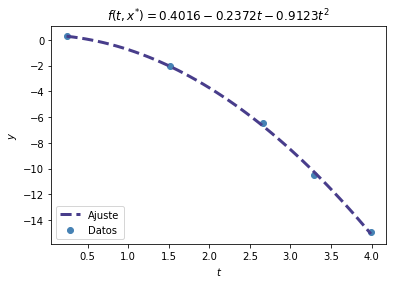

In [ ]:
# Grafica del ajuste
p = np.linspace(min(t),max(t));
ep = np.vander(p,3) @ x;
plt.plot(p,ep,'--',color='darkslateblue',label='Ajuste',linewidth = 3)
plt.scatter(t,y,color = 'steelblue',label='Datos')
ax = plt.gca();
ax.legend(loc = 'lower left')
ax.set_xlabel("$t$")
ax.set_ylabel("$y$")
ax.set_title(f"$f(t,x^{{*}}) = {x[2]:2.4f} {x[1]:+2.4f}t {x[0]:+2.4f}t^{2}$")
plt.show()

##### Algoritmo - Ortogonalización de Gram-Schmidt

* *Entrada* - $A\in\mathbb{R}^{m\times n}$ con $m>n$.
* *Salida* - $Q\in\mathbb{R}^{m\times n}$ y $R\in\mathbb{R}^{n\times n}$ tales que $A = QR$.

1. **Para** $k = 1\to n$ **hacer**
    1. $Q^{[k]} = A^{[k]}$
    2. **Para** $j = 1 \to k-1$ **hacer**
        1. $R_{jk} = {Q^{[j]}}^{\intercal}A^{[k]}$ $\langle Q^{[j]},A^{[k]}\rangle$
        2. $Q^{[k]} = Q^{[k]} - R_{jk}Q^{[j]}$
    3. $R_{kk} = \|Q^{[k]}\|_{2}$
    4. $Q^{[k]} = Q^{[k]} / R_{kk}$
2. **Regresar** Q y R.

In [ ]:
def qr_GramSchmidt(A):
    m,n = A.shape
    Q = np.empty((m,n),dtype = "float64")
    R = np.zeros((n,n))
    for k in range(n):
        Q[:,k] = np.copy(A[:,k])
        for j in range(k):
            R[j,k] = Q[:,j].T@A[:,k]
            Q[:,k] -= R[j,k]*Q[:,j]
        R[k,k] = np.linalg.norm(Q[:,k])
        Q[:,k] /= R[k,k]
    return Q,R

###### Prueba

Usamos la matriz $A$ de antes para probar la rutina de factorización QR con ortogonalización de Gram-Schmidt.

In [ ]:
Q_gs,R_gs = qr_GramSchmidt(A)
with np.printoptions(precision=4, suppress=True):
    print(f"Q = \n{Q_gs}",f"R = \n{R_gs}",sep='\n\n')
    print(f"\nA = \n{A}",f"QR = \n{Q_gs@R_gs}",f"Son iguales? = {np.allclose(A,Q_gs@R_gs)}",sep='\n\n')

Q = 
[[ 0.3424  0.5172 -0.2095]
 [ 0.7725 -0.4423  0.1662]
 [ 0.0028  0.1788  0.9546]
 [ 0.1106  0.6906  0.0461]
 [ 0.5232  0.1676 -0.123 ]]

R = 
[[20.6284  5.8804  1.7515]
 [ 0.      1.2455  1.1118]
 [ 0.      0.      0.8343]]

A = 
[[ 7.0639  2.6578  1.    ]
 [15.9361  3.992   1.    ]
 [ 0.0571  0.2389  1.    ]
 [ 2.2819  1.5106  1.    ]
 [10.7919  3.2851  1.    ]]

QR = 
[[ 7.0639  2.6578  1.    ]
 [15.9361  3.992   1.    ]
 [ 0.0571  0.2389  1.    ]
 [ 2.2819  1.5106  1.    ]
 [10.7919  3.2851  1.    ]]

Son iguales? = True


### Funciones de prueba

En esta parte se presentan algunas funciones interactivas utilizando controles (widgets) para la generación de datos y ajuste de curvas mediante mínimos cuadrados y utilizando la factorización QR, utilizando las herramientas del módulo ```numpy```.

In [ ]:
# Generador de datos
# Controles
n_widget = widgets.IntSlider(value=25,min=3,max=300,description='N. nodos:',continuous_update=False)
fun_widget = widgets.Text(value='None',description='Funcion:',continuous_update=False)
dom_widget = widgets.FloatRangeSlider(value = [0.0, 1.0],min=-10,max=10,step=0.1,\
                               description='Intervalo:',continuous_update=False)
randpos_widget = widgets.Checkbox(value=True,description='Posiciones aleatorias')
error_widget = widgets.Checkbox(value=True,description='Error')
ferror_widget = widgets.FloatSlider(value=0.1,min=0.1,max=1,description='Varianza error',continuous_update=False)
savefile_widget = widgets.Checkbox(value = True, description = 'Guardar datos')
datafile_widget = widgets.Text(value='Datos.csv',description='Nombre archivo:',continuous_update=False)

# Funcion generadora de datos
def genData(n = 25,fun = 'None',dom = [0.0, 1.0],randpos = True, error = True,\
            ferror = 0.1,savefile = True,datafile = 'Datos.csv'):
    """Genera de manera interactica un conjunto de datos (t_{i},y_{i}) para el ajuste de curvas.
Los datos se guardan directamente en un archivo csv cuando la opcion savefile esta activa.
La función muestra una gráfica de los puntos generados.

    - Entrada >
    
      n (int)          - Numero de datos generados.
      fun (str)        - Expresion de la funcion para generar una tendencia en las observaciones y_{i}. 
                         Se evalua con 'eval' y debe producir una funcion real f(t). Si no hay funcion
                         de tendencia, las observaciones se generan de manera aleatoria en un rango 
                         de valores dado por 'dom'
      dom (list-float) - Dominio en 1D para generar los puntos de evaluacion t_{i} (variable independiente).
      randpos (bool)   - Si es True, los puntos de evaluacion t_{i} se generan de forma aleatoria
                         en el intervalo definido en 'dom'. Si es False, se generan de forma equiespaciada.
      error (bool)     - Si es True y hay una funcion de tendencia, se agrega un error normal con media cero
                         y varianza 'ferror' a las observaciones y_{i}. Si es False, no se agrega error
                         a las observaciones cuando hay una funcion de tendencia.
      ferror (float)   - Varianza para el error en las observaciones y_{i} cuando hay una función de 
      savefile (bool)  - Si es True, los datos generados se guardan en un archivo en formato csv.
                         Si es False, lo datos no se guardan.
      datafile (str)   - Nombre del archivo donde se guardan los datos.
    """
    D = np.empty((n,2),dtype = "float64")
    d = dom[1] - dom[0]
    # Se generan los puntos t_{i} en el intervalo definido por dom
    if randpos:
        D[:,0] = dom[0] + np.random.rand(n)*d
    else:
        D[:,0] = np.linspace(dom[0],dom[1],n)
    
    # Se generan las observaciones y_{i}
    fun = eval(fun) # Funcion de tendencia
    if callable(fun) and not error: # Con tendencia
        D[:,1] = fun(D[:,0])
    elif callable(fun) and error: # Con tendencia y error
        D[:,1] = fun(D[:,0]) + ferror*np.random.randn(n)
    else: # Aleatorias en dom
        D[:,1] = dom[0] + np.random.rand(n)*d
    # Grafica de los datos
    plt.scatter(D[:,0],D[:,1],color = 'steelblue',label='Datos')
    # Guardar los datos en un archivo csv
    if savefile:
        with open(datafile,"w") as f:
            writer = csv.writer(f)
            writer.writerows(D)

interact(genData,n = n_widget,fun = fun_widget,dom = dom_widget,randpos = randpos_widget,\
         error = error_widget,ferror = ferror_widget,savefile = savefile_widget,\
         datafile = datafile_widget);

interactive(children=(IntSlider(value=25, continuous_update=False, description='N. nodos:', max=300, min=3), T…

In [ ]:
# Funciones auxiliares. Es importante ejecutar esta celda antes que las de abajo.

## Controles
### Control de entrada de texto para el nombre del archivo de datos.
df_widget = widgets.Text(value='Datos.csv',description='Funcion:',continuous_update=False)
### Control para el valor del grado del polinomio.
gp_widget = widgets.IntSlider(value=1,min=1,max=10,description='Grad. polinomio:',continuous_update=False)

## Cambiar limite en el control del grado del polinomio.
def update_gp_range(val):
    """Modifica el valor maximo para el control del grado del polinomio.
    
    - Entrada >
      val (int) - Valor maximo para el control.
    """
    gp_widget.max = val

## Lectura de los archivos csv
def readdata(filename):
    """Lee la informacion del archivo csv y la regresa como un ndarray
    
    - Entrada >
      filename (str) - Nombre del archivo donde se guardan los datos.
      
    - Salida >
      (2D ndarray - float) - Matriz con los datos
    """
    L = []
    with open(filename,"r") as f:
        reader = csv.reader(f)
        for linea in reader:
            L.append(list(map(lambda x:float(x),linea)))
    return np.array(L,dtype = "float64")

In [ ]:
# Ajuste de curvas mediante ecuaciones normales

## Funcion de ajuste
def mincuadajuspol(datafile,gp):
    """Realiza el ajuste polinomial mediante ecuaciones normales a los datos dados en un archivo csv.

    - Entrada >
    
      datafile (str) - Nombre del archivo csv donde se guardan los datos.
      gp (int)       - Grado del polinomio que se utiliza para ajustar los datos
    
    - Salida >
      (simpy) - Utiliza 'simpy' para regresar una expresion que sea visualizada como en LaTeX.
    """
    # Datos y ajuste de controles
    Datos = readdata(datafile)
    n,_ = Datos.shape
    update_gp_range(min(n-1,40))
    
    # Forma matricial del problema de min cuadrados
    A = np.vander(Datos[:,0],gp + 1)
    b = Datos[:,1]
    
    # Solucion mediante ec normales
    x = np.linalg.solve(A.transpose()@A,A.transpose()@b);
    
    # Graficacion de los datos y la curva
    p = np.linspace(min(Datos[:,0]),max(Datos[:,0]));
    y = np.vander(p,gp + 1) @ x;
    plt.plot(p,y,'--',color='darkslateblue',label='Ajuste',linewidth = 3)
    plt.scatter(Datos[:,0],Datos[:,1],color = 'steelblue',label='Datos')
    ax = plt.gca();
    ax.legend(loc = 'upper left')
    plt.show()
    
    # Expresion del modelo ajustado
    s,n = "",len(x)
    for i in range(n):
        s += f" {x[i]:2.4f}*x**{n-1-i} + "
    s += "0"
    return sympy.sympify(s)

## Llamado interactivo con los controles
interact(mincuadajuspol,datafile=df_widget,gp = gp_widget);

interactive(children=(Text(value='Datos.csv', continuous_update=False, description='Funcion:'), IntSlider(valu…

In [ ]:
# Ajuste de curvas mediante factorización QR

## Funcion de ajuste
def qrmincuadajuspol(datafile,gp):
    """Realiza el ajuste polinomial mediante factorizacion QR a los datos dados en un archivo csv.

    - Entrada >
    
      datafile (str) - Nombre del archivo csv donde se guardan los datos.
      gp (int)       - Grado del polinomio que se utiliza para ajustar los datos
    
    - Salida >
      (simpy) - Utiliza 'simpy' para regresar una expresion que sea visualizada como en LaTeX.
    """
    # Datos y ajuste de controles
    Datos = readdata(datafile)
    n,_ = Datos.shape
    update_gp_range(min(n-1,40))
    
    # Forma matricial del problema de min cuadrados
    A = np.vander(Datos[:,0],gp + 1)
    b = Datos[:,1]
    
    # Solucion mediante factorizacion QR
    Q,R = np.linalg.qr(A)
    x = ssl.STS(R,b@Q);
    
    # Graficacion de los datos y la curva
    p = np.linspace(min(Datos[:,0]),max(Datos[:,0]));
    y = np.vander(p,gp + 1) @ x;
    plt.plot(p,y,'--',color='darkslateblue',label='Ajuste',linewidth = 3)
    plt.scatter(Datos[:,0],Datos[:,1],color = 'steelblue',label='Datos')
    ax = plt.gca();
    ax.legend(loc = 'upper left')
    plt.show()
    
    # Expresion del modelo ajustado
    s,n = "",len(x)
    for i in range(n):
        s += f" {x[i]:2.4f}*x**{n-1-i} + "
    s += "0"
    return sympy.sympify(s)

## Llamado interactivo con los controles
interact(qrmincuadajuspol,datafile=df_widget,gp = gp_widget);

interactive(children=(Text(value='Datos.csv', continuous_update=False, description='Funcion:'), IntSlider(valu…